In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [38]:
content_img = Image.open('city_pic_path')
content_img_arr = np.asarray(content_img) / 255.

style_img = Image.open('style_image_path')
style_img_arr = np.asarray(style_img) / 255.

In [23]:
# if having problems loading images

# def load_img(path_to_img):
#   max_dim = 512
#   img = tf.io.read_file(path_to_img)
#   img = tf.image.decode_image(img, channels=3)
#   img = tf.image.convert_image_dtype(img, tf.float32)

#   shape = tf.cast(tf.shape(img)[:-1], tf.float32)
#   long_dim = max(shape)
#   scale = max_dim / long_dim

#   new_shape = tf.cast(shape * scale, tf.int32)

#   img = tf.image.resize(img, new_shape)
#   img = img[tf.newaxis, :]
#   return img

In [29]:
# content_img = load_img('content_img_path')
# style_img = load_img('style_img_path')

In [39]:
content_img_tensor = tf.constant(content_img_arr, dtype=tf.float32)
style_img_tensor = tf.constant(style_img_arr, dtype=tf.float32)
content_img_tensor = content_img_tensor[tf.newaxis, ...]
style_img_tensor = style_img_tensor[tf.newaxis, ...]

style_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
outputs =  style_model(content_img_tensor, style_img_tensor)

In [40]:
stylized_image = outputs[0]
stylized_image = tf.squeeze(stylized_image)

(-0.5, 639.5, 479.5, -0.5)

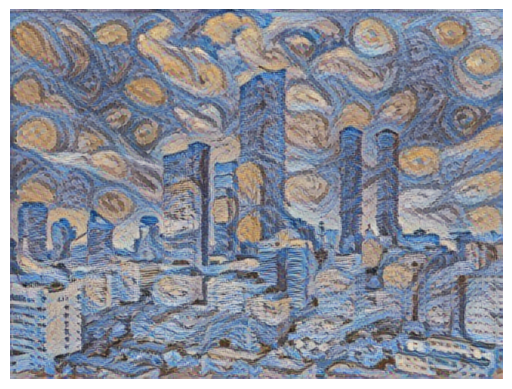

In [41]:
plt.imshow(stylized_image.numpy())
plt.axis(False)